In [1]:
#Notebook for calculation of dynamic fuel consumption from sum of totals each day.



In [2]:
import pandas as pd
import sklearn as sk
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import matplotlib.pyplot as plt
#%pylab inline
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('../database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

Loading database ...
Time to load database: 4.760087966918945


In [3]:


features =  ['rpm',
             'frp',
             'exh_T',
             'TC_rpm']



feat = pd.read_excel('training_setup.xlsx',index_col='test_no')

# Create a list of features for each test. A list which will contain a list of features for each row. This list
# will be used for the training.

test_features = list()


for i in range(30):
    
    tmp_l = list()
    
    if feat.iloc[i][0] == 1:
        #print('ett')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 2:
        #print('två')
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 3:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        
    elif feat.iloc[i][0] == 4:
        for j in range(1,5):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(5,9):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(9,13):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
        for j in range(13,17):
            tmp_l.append(d[feat.iloc[i][j]])
            print('Test:',i+1,feat.iloc[i][j])
    
    test_features.append(tmp_l)

# And then at last add the corresponding predictor to each test set.


for i in range(len(test_features)):
    if 'AE1' in test_features[i][0]:
        test_features[i].append(d['fo_booster_13'])
    if 'AE2' in test_features[i][0]:
        test_features[i].append(d['fo_booster_24'])


Test: 1 ae1_rpm
Test: 1 ae3_rpm
Test: 1 me1_rpm
Test: 1 me3_rpm
Test: 2 ae1_frp
Test: 2 ae3_frp
Test: 2 me1_frp
Test: 2 me3_frp
Test: 3 ae1_exh_T
Test: 3 ae3_exh_T
Test: 3 me1_exh_T
Test: 3 me3_exh_T
Test: 4 ae1_TC_rpm
Test: 4 ae3_TC_rpm
Test: 4 me1_TC_rpm
Test: 4 me3_TC_rpm
Test: 5 ae1_rpm
Test: 5 ae3_rpm
Test: 5 me1_rpm
Test: 5 me3_rpm
Test: 5 ae1_frp
Test: 5 ae3_frp
Test: 5 me1_frp
Test: 5 me3_frp
Test: 6 ae1_rpm
Test: 6 ae3_rpm
Test: 6 me1_rpm
Test: 6 me3_rpm
Test: 6 ae1_exh_T
Test: 6 ae3_exh_T
Test: 6 me1_exh_T
Test: 6 me3_exh_T
Test: 7 ae1_rpm
Test: 7 ae3_rpm
Test: 7 me1_rpm
Test: 7 me3_rpm
Test: 7 ae1_TC_rpm
Test: 7 ae3_TC_rpm
Test: 7 me1_TC_rpm
Test: 7 me3_TC_rpm
Test: 8 ae1_frp
Test: 8 ae3_frp
Test: 8 me1_frp
Test: 8 me3_frp
Test: 8 ae1_exh_T
Test: 8 ae3_exh_T
Test: 8 me1_exh_T
Test: 8 me3_exh_T
Test: 9 ae1_frp
Test: 9 ae3_frp
Test: 9 me1_frp
Test: 9 me3_frp
Test: 9 ae1_TC_rpm
Test: 9 ae3_TC_rpm
Test: 9 me1_TC_rpm
Test: 9 me3_TC_rpm
Test: 10 ae1_exh_T
Test: 10 ae3_exh_T
Test: 

In [4]:
df_train = pd.DataFrame()
for i in range(len(test_features)):
    df_train = df_train.append(df[test_features[i]]).resample('15min').mean()
    

df_train = df_train.dropna()

# Filter out below zero
    

for n in list(df_train):
    df_train[n][(df_train[n] < 0)] = 0
    

date_begin = '2014-02-01'
date_end = '2014-12-16'

df_train = df_train[date_begin:date_end]

print(df_train.describe())

       AE1 ENG SPEED:1745:RPM:Average:900  \
count                        30624.000000   
mean                           394.698595   
std                            367.883957   
min                              0.000000   
25%                              0.000000   
50%                            737.733333   
75%                            750.466667   
max                            760.000000   

       AE1 EXH MEAN VALUE:1591:  C:Average:900  \
count                             30624.000000   
mean                                222.944978   
std                                 146.610908   
min                                   0.000000   
25%                                  75.466667   
50%                                 320.400000   
75%                                 359.533333   
max                                 431.066667   

       AE1 FUEL RACK POSIT:1742:mm:Average:900  \
count                             30624.000000   
mean                                 10.828

In [5]:
df_train

,AE1 ENG SPEED:1745:RPM:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE2 ENG SPEED:2745:RPM:Average:900,AE2 EXH MEAN VALUE:2591: C:Average:900,AE2 FUEL RACK POSIT:2742:mm:Average:900,AE2 TC SPEED:2748:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,...,ME2 FUEL RACK POSIT:20005:%:Average:900,ME2 T/C SPEED:20006:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,ME4 ENGINE SPEED:4364:rpm:Average:900,ME4 EXH GAS MEAN:4125:C:Average:900,ME4 FUEL RACK POSIT:40005:%:Average:900,ME4 T/C SPEED:40006:rpm:Average:900
Time,,,,,,,,,,,,,,,,,,,,,
2014-02-01 00:00:00,750.466667,390.533333,28.400000,20957.800000,0.000000,75.400000,4.000000,0.000000,0.000000,73.533333,...,0.0,110.866914,0.804233,69.869762,0.000000,29.304029,0.000000,71.460320,0.000000,80.586082
2014-02-01 00:15:00,750.066667,389.066667,27.533333,20764.800000,0.000000,77.133333,4.000000,0.000000,0.000000,76.600000,...,0.0,102.564103,0.793651,71.440785,0.000000,29.304029,0.000000,72.933662,0.000000,80.586082
2014-02-01 00:30:00,750.333333,388.800000,27.600000,20669.200000,0.000000,78.533333,4.000000,0.000000,0.000000,78.066667,...,0.0,96.703299,0.793651,72.926337,0.000000,29.304029,0.000000,74.464798,0.000000,80.586082
2014-02-01 00:45:00,750.000000,387.933333,27.600000,20812.000000,0.000000,79.200000,4.000000,0.000000,0.000000,79.000000,...,0.0,90.354090,0.793651,74.035006,0.000000,29.304029,0.000000,75.619051,0.000000,80.586082
2014-02-01 01:00:00,750.733333,386.800000,27.266667,20622.733333,0.000000,80.000000,4.000000,0.000000,0.000000,80.000000,...,0.0,87.912086,0.793651,74.818076,0.000000,29.304029,0.000000,76.389097,0.000000,80.586082
2014-02-01 01:15:00,750.533333,387.133333,27.333333,20588.533333,0.000000,80.200000,4.000000,0.000000,0.000000,80.000000,...,0.0,86.935286,0.814815,75.413108,0.000000,29.304029,0.000000,76.967037,0.000000,80.586082
2014-02-01 01:30:00,750.733333,385.466667,27.333333,20623.666667,0.000000,81.000000,4.000000,0.000000,0.000000,80.800000,...,0.0,83.516484,0.804233,75.975583,0.000000,29.304029,0.000000,77.540093,0.000000,80.586082
2014-02-01 01:45:00,750.000000,385.400000,27.466667,20605.133333,0.000000,81.266667,4.000000,0.000000,0.000000,81.000000,...,0.0,80.097682,0.825397,76.511195,0.000000,29.304029,0.000000,78.065123,0.000000,80.586082
2014-02-01 02:00:00,750.133333,386.200000,27.000000,20523.733333,0.000000,82.000000,4.000000,0.000000,0.000000,81.200000,...,0.0,78.632479,0.804233,76.901101,0.000000,29.304029,0.000000,78.444448,0.000000,80.586082


In [6]:
##

# Now resample the dataset to one day average.


##


df_train2 = df_train.resample('1D').mean()

In [7]:

df_train2


,AE1 ENG SPEED:1745:RPM:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE2 ENG SPEED:2745:RPM:Average:900,AE2 EXH MEAN VALUE:2591: C:Average:900,AE2 FUEL RACK POSIT:2742:mm:Average:900,AE2 TC SPEED:2748:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,...,ME2 FUEL RACK POSIT:20005:%:Average:900,ME2 T/C SPEED:20006:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,ME4 ENGINE SPEED:4364:rpm:Average:900,ME4 EXH GAS MEAN:4125:C:Average:900,ME4 FUEL RACK POSIT:40005:%:Average:900,ME4 T/C SPEED:40006:rpm:Average:900
Time,,,,,,,,,,,,,,,,,,,,,
2014-02-01,642.322222,331.825694,18.741667,15031.242361,399.412500,229.721528,12.951389,7809.988889,126.810417,130.720833,...,0.000000,46.092795,253.288699,302.428415,24.248697,8308.363901,251.433099,287.542561,24.946680,9315.425381
2014-02-02,474.695139,260.498611,12.636111,10305.982639,448.454861,254.515972,15.966667,9853.865972,114.620139,123.305556,...,24.263531,8808.892999,0.434634,72.809611,0.000000,29.334554,0.000000,77.717019,0.000000,80.606432
2014-02-03,487.011111,268.643750,15.278472,11795.482639,369.751389,214.102778,11.576389,6765.273611,121.029861,123.304167,...,0.670737,296.530322,246.564382,299.070051,21.269801,7794.210460,226.745489,270.776551,19.840753,8090.420277
2014-02-04,586.199306,300.034028,15.404861,12511.573611,407.712500,231.270833,12.530556,7610.475000,119.561111,124.519444,...,19.983735,7763.583687,11.241402,83.869297,0.852431,347.054336,0.000000,77.197203,0.000000,80.606432
2014-02-05,364.860417,211.575000,7.812500,6872.304167,504.479167,279.357639,18.561806,11765.920139,98.083333,111.799306,...,0.069482,76.714488,255.880300,302.365168,23.159663,8394.317320,253.045754,287.219122,23.475786,9405.972769
2014-02-06,487.470139,263.142361,12.130556,10142.315972,50.747222,101.446528,4.859028,797.495833,105.382639,122.972222,...,22.773838,8494.439415,1.433862,79.130896,0.016491,41.992268,0.725970,83.599905,0.014592,92.409444
2014-02-07,614.875694,317.214583,17.211806,13902.131250,382.446528,223.873611,12.561806,7422.745833,109.391667,122.977778,...,0.293858,166.956654,225.965065,279.902476,18.031338,6921.784736,224.138125,269.343045,18.164807,7703.586734
2014-02-08,415.923611,234.433333,10.197222,8375.615278,643.024306,332.442361,21.604167,14647.069444,119.738889,123.947222,...,0.000000,37.047211,274.890442,322.743900,24.071446,8943.136997,272.979176,308.271270,24.701715,9964.621530
2014-02-09,464.288194,254.193750,11.858333,9820.613194,381.700000,224.017361,13.386111,8025.400000,107.571528,119.043750,...,21.635471,8448.448349,4.555445,75.851338,0.180463,115.811967,4.195767,79.768887,0.159966,172.903950


In [8]:
df_train2.describe()

,AE1 ENG SPEED:1745:RPM:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE2 ENG SPEED:2745:RPM:Average:900,AE2 EXH MEAN VALUE:2591: C:Average:900,AE2 FUEL RACK POSIT:2742:mm:Average:900,AE2 TC SPEED:2748:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,...,ME2 FUEL RACK POSIT:20005:%:Average:900,ME2 T/C SPEED:20006:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,ME4 ENGINE SPEED:4364:rpm:Average:900,ME4 EXH GAS MEAN:4125:C:Average:900,ME4 FUEL RACK POSIT:40005:%:Average:900,ME4 T/C SPEED:40006:rpm:Average:900
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,...,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,394.698595,222.944978,10.828951,8349.694446,324.487335,203.659239,12.654099,6759.406479,169.412385,146.880291,...,12.165520,4484.403686,136.519933,187.907736,12.547920,4757.749316,124.419687,180.895840,11.743487,4594.686134
std,186.949109,83.366598,6.329723,4393.665845,196.731226,77.066505,5.820554,4464.424222,119.594829,50.880089,...,10.774076,3900.602592,110.332921,93.744815,10.606434,3869.683269,108.312952,91.702636,10.608666,3962.013011
min,0.000000,0.000000,0.000000,0.000000,0.000000,39.643056,3.179861,0.000000,0.000000,50.547222,...,0.000000,36.630035,0.007275,63.063469,0.000000,7.554945,0.000000,59.177540,0.000000,73.260071
25%,307.967014,192.198264,7.277778,6022.297569,180.265625,145.812153,8.239931,3297.181597,95.426042,114.724306,...,0.987138,447.975174,17.516094,86.191527,1.375825,579.828046,0.848104,80.304308,0.010268,98.341474
50%,399.388194,227.420139,9.692361,7980.816667,314.492361,201.586111,11.675694,6410.089583,110.523611,122.338889,...,14.604062,5210.419255,189.510699,230.385261,17.294551,6730.423308,154.543215,199.955289,16.324695,6231.695200
75%,515.629861,279.398264,14.313194,11278.431250,468.789583,257.567708,16.984028,9996.734375,240.035764,181.233681,...,21.501033,8182.486305,236.529053,272.310176,20.857643,8118.198039,227.187453,268.085138,20.155241,8149.824519
max,750.439583,362.325694,46.519444,17638.572917,750.524306,398.858333,31.677083,19521.896528,716.746528,373.547917,...,37.236383,12506.288222,356.714298,355.612406,42.994465,13951.205809,352.476202,376.284501,43.525535,14033.541983


In [9]:

# Train a model with the data from the resampled dataset.

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

cores = -1
seed = 42
test_no = 29
gen = 10

In [10]:


df_out = pd.DataFrame()

df_test = df_train2[test_features[test_no]]

print(test_features[test_no])

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

# make a test and train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)

# 

print('Test number, linear model: ', test_no, '\n')
m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
m_tpot.fit(X_train, y_train.reshape(-1,))

df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)
    
MSE = mean_squared_error(m_tpot.predict(X_test),y_test)
MSE_perc = mean_squared_error(m_tpot.predict(X_test),y_test)/max(y_test)
R_2 = r2_score(m_tpot.predict(X_test),y_test)

print('MSE: ',MSE )
print('MSE %: ',MSE_perc )
print('R2 score:', R_2)

df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

score = m_linear.score(X_test,y_test)
score_perc = m_linear.score(X_test,y_test)/max(y_test)
print('Score: ',score )
print('Score in % of max: ',score_perc )


['AE2 ENG SPEED:2745:RPM:Average:900', 'AE4 ENG SPEED:4745:RPM:Average:900', 'ME2 ENGINE SPEED:2364:rpm:Average:900', 'ME4 ENGINE SPEED:4364:rpm:Average:900', 'AE2 FUEL RACK POSIT:2742:mm:Average:900', 'AE4 FUEL RACK POSIT:4742:mm:Average:900', 'ME2 FUEL RACK POSIT:20005:%:Average:900', 'ME4 FUEL RACK POSIT:40005:%:Average:900', 'AE2 EXH MEAN VALUE:2591:  C:Average:900', 'AE4 EXH MEAN VALUE:4591:  C:Average:900', 'ME2 EXH GAS MEAN:2125:C:Average:900', 'ME4 EXH GAS MEAN:4125:C:Average:900', 'AE2 TC SPEED:2748:RPM:Average:900', 'AE4 TC SPEED:4748:RPM:Average:900', 'ME2 T/C SPEED:20006:rpm:Average:900', 'ME4 T/C SPEED:40006:rpm:Average:900', 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']
Test number, linear model:  29 



/home/fredde/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Optimization Progress:  18%|█▊        | 100/550 [00:22<05:41,  1.32pipeline/s]

Generation 1 - Current best internal CV score: -0.00021745175950349315


Optimization Progress:  27%|██▋       | 150/550 [00:32<04:51,  1.37pipeline/s]

Generation 2 - Current best internal CV score: -0.00021745175950349315


Optimization Progress:  36%|███▋      | 200/550 [00:45<04:32,  1.28pipeline/s]

Generation 3 - Current best internal CV score: -0.0002174517595034602


Optimization Progress:  45%|████▌     | 250/550 [00:59<05:24,  1.08s/pipeline]

Generation 4 - Current best internal CV score: -0.0002174517595034602


Optimization Progress:  55%|█████▍    | 300/550 [01:09<04:13,  1.01s/pipeline]

Generation 5 - Current best internal CV score: -0.00021387142030396896


Optimization Progress:  64%|██████▎   | 350/550 [01:22<02:24,  1.38pipeline/s]

Generation 6 - Current best internal CV score: -0.00020994918694044996


Optimization Progress:  73%|███████▎  | 400/550 [01:28<01:23,  1.79pipeline/s]

Generation 7 - Current best internal CV score: -0.00020994918694044996


Optimization Progress:  82%|████████▏ | 450/550 [01:42<00:59,  1.68pipeline/s]

Generation 8 - Current best internal CV score: -0.00020994918694044939


Optimization Progress:  91%|█████████ | 500/550 [01:59<00:40,  1.24pipeline/s]

Generation 9 - Current best internal CV score: -0.00020994918694044939


Generation 10 - Current best internal CV score: -0.00020983173429641364

Best pipeline: LassoLarsCV(RandomForestRegressor(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.15000000000000002, min_samples_leaf=16, min_samples_split=16, n_estimators=100), bootstrap=False, max_features=1.0, min_samples_leaf=7, min_samples_split=17, n_estimators=100), normalize=True)
MSE:  0.00023377094913172545
MSE %:  0.00023152131160247215
R2 score: 0.9810929581478723
Score:  0.9809750886150579
Score in % of max:  0.9715349148774413


In [11]:
df_train

,AE1 ENG SPEED:1745:RPM:Average:900,AE1 EXH MEAN VALUE:1591: C:Average:900,AE1 FUEL RACK POSIT:1742:mm:Average:900,AE1 TC SPEED:1748:RPM:Average:900,AE2 ENG SPEED:2745:RPM:Average:900,AE2 EXH MEAN VALUE:2591: C:Average:900,AE2 FUEL RACK POSIT:2742:mm:Average:900,AE2 TC SPEED:2748:RPM:Average:900,AE3 ENG SPEED:3745:RPM:Average:900,AE3 EXH MEAN VALUE:3591: C:Average:900,...,ME2 FUEL RACK POSIT:20005:%:Average:900,ME2 T/C SPEED:20006:rpm:Average:900,ME3 ENGINE SPEED:3364:rpm:Average:900,ME3 EXH GAS MEAN:3125:C:Average:900,ME3 FUEL RACK POSIT:30005:%:Average:900,ME3 T/C SPEED:30006:rpm:Average:900,ME4 ENGINE SPEED:4364:rpm:Average:900,ME4 EXH GAS MEAN:4125:C:Average:900,ME4 FUEL RACK POSIT:40005:%:Average:900,ME4 T/C SPEED:40006:rpm:Average:900
Time,,,,,,,,,,,,,,,,,,,,,
2014-02-01 00:00:00,750.466667,390.533333,28.400000,20957.800000,0.000000,75.400000,4.000000,0.000000,0.000000,73.533333,...,0.0,110.866914,0.804233,69.869762,0.000000,29.304029,0.000000,71.460320,0.000000,80.586082
2014-02-01 00:15:00,750.066667,389.066667,27.533333,20764.800000,0.000000,77.133333,4.000000,0.000000,0.000000,76.600000,...,0.0,102.564103,0.793651,71.440785,0.000000,29.304029,0.000000,72.933662,0.000000,80.586082
2014-02-01 00:30:00,750.333333,388.800000,27.600000,20669.200000,0.000000,78.533333,4.000000,0.000000,0.000000,78.066667,...,0.0,96.703299,0.793651,72.926337,0.000000,29.304029,0.000000,74.464798,0.000000,80.586082
2014-02-01 00:45:00,750.000000,387.933333,27.600000,20812.000000,0.000000,79.200000,4.000000,0.000000,0.000000,79.000000,...,0.0,90.354090,0.793651,74.035006,0.000000,29.304029,0.000000,75.619051,0.000000,80.586082
2014-02-01 01:00:00,750.733333,386.800000,27.266667,20622.733333,0.000000,80.000000,4.000000,0.000000,0.000000,80.000000,...,0.0,87.912086,0.793651,74.818076,0.000000,29.304029,0.000000,76.389097,0.000000,80.586082
2014-02-01 01:15:00,750.533333,387.133333,27.333333,20588.533333,0.000000,80.200000,4.000000,0.000000,0.000000,80.000000,...,0.0,86.935286,0.814815,75.413108,0.000000,29.304029,0.000000,76.967037,0.000000,80.586082
2014-02-01 01:30:00,750.733333,385.466667,27.333333,20623.666667,0.000000,81.000000,4.000000,0.000000,0.000000,80.800000,...,0.0,83.516484,0.804233,75.975583,0.000000,29.304029,0.000000,77.540093,0.000000,80.586082
2014-02-01 01:45:00,750.000000,385.400000,27.466667,20605.133333,0.000000,81.266667,4.000000,0.000000,0.000000,81.000000,...,0.0,80.097682,0.825397,76.511195,0.000000,29.304029,0.000000,78.065123,0.000000,80.586082
2014-02-01 02:00:00,750.133333,386.200000,27.000000,20523.733333,0.000000,82.000000,4.000000,0.000000,0.000000,81.200000,...,0.0,78.632479,0.804233,76.901101,0.000000,29.304029,0.000000,78.444448,0.000000,80.586082


In [12]:
# Compare the model with data for 15-min.

df_test = df_train[test_features[test_no]]

print(test_features[test_no])

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])


['AE2 ENG SPEED:2745:RPM:Average:900', 'AE4 ENG SPEED:4745:RPM:Average:900', 'ME2 ENGINE SPEED:2364:rpm:Average:900', 'ME4 ENGINE SPEED:4364:rpm:Average:900', 'AE2 FUEL RACK POSIT:2742:mm:Average:900', 'AE4 FUEL RACK POSIT:4742:mm:Average:900', 'ME2 FUEL RACK POSIT:20005:%:Average:900', 'ME4 FUEL RACK POSIT:40005:%:Average:900', 'AE2 EXH MEAN VALUE:2591:  C:Average:900', 'AE4 EXH MEAN VALUE:4591:  C:Average:900', 'ME2 EXH GAS MEAN:2125:C:Average:900', 'ME4 EXH GAS MEAN:4125:C:Average:900', 'AE2 TC SPEED:2748:RPM:Average:900', 'AE4 TC SPEED:4748:RPM:Average:900', 'ME2 T/C SPEED:20006:rpm:Average:900', 'ME4 T/C SPEED:40006:rpm:Average:900', 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']


In [13]:

date1='2014-04-06'
date2='2014-04-07'

dates = date1 + ':' + date2

results_folder = 'results/'

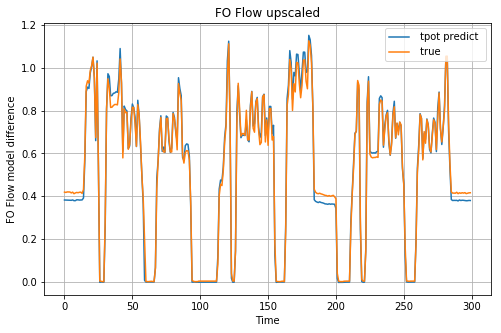

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')
plt.plot(m_tpot.predict(X)[100:400],label=' tpot predict ')


plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow upscaled')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
fig.savefig(results_folder + date1 + "tpot_10gen_diff.png",dpi=1200)

In [15]:
#_1_3 is the mass flow meters, in tonnes for each day.

fo_total = pd.DataFrame(df[['FO_day_engine_1_3','FO_day_engine_2_4']].dropna())


In [16]:
fo_total

,FO_day_engine_1_3,FO_day_engine_2_4
Time,,
2014-02-01,14.88,12.15
2014-02-02,11.91,13.80
2014-02-03,12.78,12.30
2014-02-04,12.74,11.69
2014-02-05,10.66,16.00
2014-02-06,11.94,13.67
2014-02-07,12.63,10.95
2014-02-08,11.69,15.85
2014-02-09,11.76,14.02


In [17]:
df_test = df_train[test_features[test_no]]
list(df_test)


['AE2 ENG SPEED:2745:RPM:Average:900',
 'AE4 ENG SPEED:4745:RPM:Average:900',
 'ME2 ENGINE SPEED:2364:rpm:Average:900',
 'ME4 ENGINE SPEED:4364:rpm:Average:900',
 'AE2 FUEL RACK POSIT:2742:mm:Average:900',
 'AE4 FUEL RACK POSIT:4742:mm:Average:900',
 'ME2 FUEL RACK POSIT:20005:%:Average:900',
 'ME4 FUEL RACK POSIT:40005:%:Average:900',
 'AE2 EXH MEAN VALUE:2591:  C:Average:900',
 'AE4 EXH MEAN VALUE:4591:  C:Average:900',
 'ME2 EXH GAS MEAN:2125:C:Average:900',
 'ME4 EXH GAS MEAN:4125:C:Average:900',
 'AE2 TC SPEED:2748:RPM:Average:900',
 'AE4 TC SPEED:4748:RPM:Average:900',
 'ME2 T/C SPEED:20006:rpm:Average:900',
 'ME4 T/C SPEED:40006:rpm:Average:900',
 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']

In [18]:
df_test_day_av = df_test.resample('1D').mean()

In [19]:
df_test_day_av

,AE2 ENG SPEED:2745:RPM:Average:900,AE4 ENG SPEED:4745:RPM:Average:900,ME2 ENGINE SPEED:2364:rpm:Average:900,ME4 ENGINE SPEED:4364:rpm:Average:900,AE2 FUEL RACK POSIT:2742:mm:Average:900,AE4 FUEL RACK POSIT:4742:mm:Average:900,ME2 FUEL RACK POSIT:20005:%:Average:900,ME4 FUEL RACK POSIT:40005:%:Average:900,AE2 EXH MEAN VALUE:2591: C:Average:900,AE4 EXH MEAN VALUE:4591: C:Average:900,ME2 EXH GAS MEAN:2125:C:Average:900,ME4 EXH GAS MEAN:4125:C:Average:900,AE2 TC SPEED:2748:RPM:Average:900,AE4 TC SPEED:4748:RPM:Average:900,ME2 T/C SPEED:20006:rpm:Average:900,ME4 T/C SPEED:40006:rpm:Average:900,FO BOOST 2 CONSUMPT:6166:m3/h:Average:900
Time,,,,,,,,,,,,,,,,,
2014-02-01,399.412500,37.893056,2.540785,251.433099,12.951389,1.738194,0.000000,24.946680,229.721528,92.759722,80.538821,287.542561,7809.988889,591.376389,46.092795,9315.425381,0.508385
2014-02-02,448.454861,162.458333,257.369718,0.000000,15.966667,4.750694,24.263531,0.000000,254.515972,137.079167,299.877667,77.717019,9853.865972,3041.985417,8808.892999,80.606432,0.582215
2014-02-03,369.751389,246.668750,10.602293,226.745489,11.576389,6.691667,0.670737,19.840753,214.102778,165.712500,83.787151,270.776551,6765.273611,4786.802778,296.530322,8090.420277,0.514325
2014-02-04,407.712500,151.216667,242.535282,0.000000,12.530556,5.487500,19.983735,0.000000,231.270833,136.071528,288.298165,77.197203,7610.475000,3449.102083,7763.583687,80.606432,0.493628
2014-02-05,504.479167,245.262500,5.240741,253.045754,18.561806,7.065278,0.069482,23.475786,279.357639,165.090278,74.056288,287.219122,11765.920139,5052.181944,76.714488,9405.972769,0.673277
2014-02-06,50.747222,607.200694,248.623906,0.725970,4.859028,17.164583,22.773838,0.014592,101.446528,306.356250,291.701808,83.599905,797.495833,13110.420139,8494.439415,92.409444,0.570885
2014-02-07,382.446528,107.753472,8.265543,224.138125,12.561806,4.034028,0.293858,18.164807,223.873611,118.544444,82.872562,269.343045,7422.745833,2319.104861,166.956654,7703.586734,0.461974
2014-02-08,643.024306,57.919444,2.380401,272.979176,21.604167,2.059028,0.000000,24.701715,332.442361,97.154167,74.637502,308.271270,14647.069444,965.589583,37.047211,9964.621530,0.664303
2014-02-09,381.700000,284.856944,255.878977,4.195767,13.386111,9.109722,21.635471,0.159966,224.017361,184.131250,298.294714,79.768887,8025.400000,6473.318056,8448.448349,172.903950,0.584377


In [20]:
X = np.array(df_test_day_av.drop(d['fo_booster_24'],axis=1))

In [21]:
y = np.array(fo_total['FO_day_engine_2_4']/24/4) # mass flow per day in m3 per 15min

In [22]:

# Train a model with the data from the resampled dataset.

from sklearn.externals import joblib
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df_out = pd.DataFrame()

cores = -1
seed = 42
test_no = 29
gen = 10


print(test_features[test_no])

X = np.array(df_test_day_av.drop(d['fo_booster_24'],axis=1))
y = np.array(fo_total['FO_day_engine_2_4']*15/60) # mass flow per day in m3 per 15min


# make a test and train split.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=seed)

# 

print('Test number, linear model: ', test_no, '\n')
m_linear = sk.linear_model.LinearRegression(n_jobs=cores)
m_linear.fit(X_train, y_train.reshape(-1,))

m_tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
m_tpot.fit(X_train, y_train.reshape(-1,))

df_out['tpot_test_no_'+str(test_no)] = m_tpot.predict(X)
    
MSE = mean_squared_error(m_tpot.predict(X_test),y_test)
MSE_perc = mean_squared_error(m_tpot.predict(X_test),y_test)/max(y_test)
R_2 = r2_score(m_tpot.predict(X_test),y_test)

print('MSE: ',MSE )
print('MSE %: ',MSE_perc )
print('R2 score:', R_2)

df_out['linear_test_no_'+str(test_no)] = m_linear.predict(X)

score = m_linear.score(X_test,y_test)
score_perc = m_linear.score(X_test,y_test)/max(y_test)
print('Score: ',score )
print('Score in % of max: ',score_perc )


['AE2 ENG SPEED:2745:RPM:Average:900', 'AE4 ENG SPEED:4745:RPM:Average:900', 'ME2 ENGINE SPEED:2364:rpm:Average:900', 'ME4 ENGINE SPEED:4364:rpm:Average:900', 'AE2 FUEL RACK POSIT:2742:mm:Average:900', 'AE4 FUEL RACK POSIT:4742:mm:Average:900', 'ME2 FUEL RACK POSIT:20005:%:Average:900', 'ME4 FUEL RACK POSIT:40005:%:Average:900', 'AE2 EXH MEAN VALUE:2591:  C:Average:900', 'AE4 EXH MEAN VALUE:4591:  C:Average:900', 'ME2 EXH GAS MEAN:2125:C:Average:900', 'ME4 EXH GAS MEAN:4125:C:Average:900', 'AE2 TC SPEED:2748:RPM:Average:900', 'AE4 TC SPEED:4748:RPM:Average:900', 'ME2 T/C SPEED:20006:rpm:Average:900', 'ME4 T/C SPEED:40006:rpm:Average:900', 'FO BOOST 2 CONSUMPT:6166:m3/h:Average:900']
Test number, linear model:  29 



Optimization Progress:  18%|█▊        | 100/550 [00:15<07:01,  1.07pipeline/s]

Generation 1 - Current best internal CV score: -0.025024237080367155


Optimization Progress:  27%|██▋       | 150/550 [00:22<04:22,  1.52pipeline/s]

Generation 2 - Current best internal CV score: -0.025024237080367155


Optimization Progress:  36%|███▋      | 200/550 [00:28<03:47,  1.54pipeline/s]

Generation 3 - Current best internal CV score: -0.025024237080367155


Optimization Progress:  45%|████▌     | 250/550 [00:36<03:43,  1.34pipeline/s]

Generation 4 - Current best internal CV score: -0.02498238159782253


Optimization Progress:  55%|█████▍    | 300/550 [00:48<03:40,  1.13pipeline/s]

Generation 5 - Current best internal CV score: -0.022672130491183


Optimization Progress:  64%|██████▎   | 350/550 [00:59<03:27,  1.04s/pipeline]

Generation 6 - Current best internal CV score: -0.022672130491183


Optimization Progress:  73%|███████▎  | 400/550 [01:17<04:30,  1.80s/pipeline]

Generation 7 - Current best internal CV score: -0.022672130491183


Optimization Progress:  82%|████████▏ | 450/550 [01:27<01:47,  1.07s/pipeline]

Generation 8 - Current best internal CV score: -0.02267213049118283


Optimization Progress:  91%|█████████ | 500/550 [01:36<00:44,  1.12pipeline/s]

Generation 9 - Current best internal CV score: -0.02267213049118283


Generation 10 - Current best internal CV score: -0.02267213049118283

Best pipeline: LassoLarsCV(MaxAbsScaler(LinearSVR(MaxAbsScaler(input_matrix), C=25.0, dual=True, epsilon=0.01, loss=epsilon_insensitive, tol=0.01)), normalize=True)
MSE:  0.010995900783090132
MSE %:  0.0018175042616677905
R2 score: 0.9747039355505177
Score:  0.9685956627381608
Score in % of max:  0.16009845665093567


In [23]:
# Lets try the model!

In [24]:

# drop the last column, which is the measured
X = np.array(df_test.drop(df_test.columns[len(df_test.columns)-1],axis=1))
# y is the measured value
y = np.array(df_test[df_test.columns[len(df_test.columns)-1]])

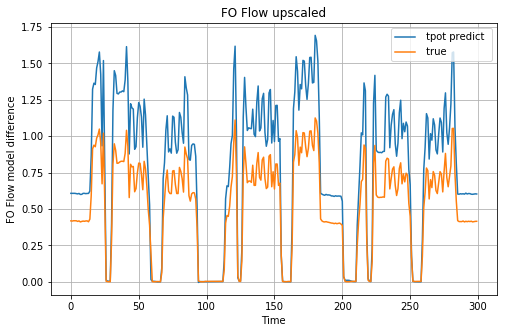

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)
#plt.plot(m_linear.predict(X)[100:400],label=' linear predict ')
plt.plot(m_tpot.predict(X)[100:400]/4,label=' tpot predict ')

plt.plot(y[100:400],label=' true ')

ax.grid()
ax.set(xlabel='Time', ylabel='FO Flow model difference',title='FO Flow upscaled')
#ax.set_ylim(-0.05,0.05)

plt.legend(loc='upper right')
#plt.xlim(pd.Timestamp(date1),pd.Timestamp(date2))
plt.show()
fig.savefig(results_folder + date1 + "massflowmeters_tpot_10gen_diff.png",dpi=1200)

In [26]:
(fo_total['FO_day_engine_2_4']*4)/df[d['fo_booster_24']].resample('1D').sum()['2014-02-01':'2014-12-16']

Time
2014-02-01    0.995800
2014-02-02    0.987607
2014-02-03    0.996452
2014-02-04    0.986742
2014-02-05    0.990182
2014-02-06    0.997720
2014-02-07    0.987610
2014-02-08    0.994149
2014-02-09    0.999640
2014-02-10    0.988458
2014-02-11    0.993603
2014-02-12    0.996342
2014-02-13    0.992715
2014-02-14    0.994092
2014-02-15    0.987663
2014-02-16    1.000040
2014-02-17    0.993105
2014-02-18    0.997573
2014-02-19    0.992464
2014-02-20    1.002466
2014-02-21    0.994733
2014-02-22    0.990005
2014-02-23    0.992620
2014-02-24    0.990231
2014-02-25    0.991744
2014-02-26    0.994834
2014-02-27    0.984775
2014-02-28    0.995482
2014-03-01    0.987188
2014-03-02    0.994013
                ...   
2014-11-17    1.007912
2014-11-18    0.989724
2014-11-19    0.999872
2014-11-20    0.998875
2014-11-21    0.989816
2014-11-22    0.989643
2014-11-23    0.996551
2014-11-24    0.997037
2014-11-25    0.992624
2014-11-26    0.996343
2014-11-27    0.993222
2014-11-28    0.983354
2014-1

In [27]:
df[d['fo_booster_24']].resample('1D').sum()['2014-02-01':'2014-12-16']

Time
2014-02-01    48.804957
2014-02-02    55.892653
2014-02-03    49.375167
2014-02-04    47.388271
2014-02-05    64.634596
2014-02-06    54.804957
2014-02-07    44.349490
2014-02-08    63.773111
2014-02-09    56.100196
2014-02-10    47.225071
2014-02-11    58.816234
2014-02-12    59.296920
2014-02-13    51.616005
2014-02-14    52.872386
2014-02-15    43.294099
2014-02-16    49.158024
2014-02-17    49.581871
2014-02-18    56.376843
2014-02-19    40.948575
2014-02-20    44.330671
2014-02-21    55.653110
2014-02-22    56.524958
2014-02-23    36.710937
2014-02-24    52.109033
2014-02-25    52.715205
2014-02-26    57.577453
2014-02-27    43.177375
2014-02-28    39.176994
2014-03-01    39.303546
2014-03-02    48.490290
                ...    
2014-11-17    56.393834
2014-11-18    53.954443
2014-11-19    57.247320
2014-11-20    44.369909
2014-11-21    35.804651
2014-11-22    40.903623
2014-11-23    51.056081
2014-11-24    49.185757
2014-11-25    58.269796
2014-11-26    49.541186
2014-11-27 